In [78]:
import networkx as nx
import numpy as np


colorDict = {-1: "red", 1: "blue"}
beta_j = 0.08


G = nx.fast_gnp_random_graph(10, 0.3)
spins = np.random.choice([-1,1], len(G.nodes))

In [89]:

toFlip = np.random.choice(np.arange(len(G.nodes)))
neighbours = list(G.adj[ toFlip ])

DEnergy = 2* spins[toFlip] * ( spins[neighbours].sum())
if DEnergy < 0:
    spins[toFlip] = 

In [80]:
colorMap = [colorDict[element] for element in spins]

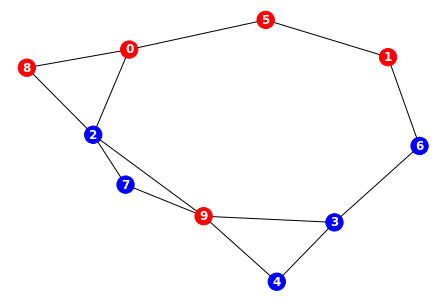

In [88]:
nx.draw(G,with_labels=True, font_color="white",  font_weight = "bold", node_color=colorMap)